In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import os

# choose oparating system

syst_op = 'mac'

if syst_op == 'mac':
    os.chdir('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/')
elif syst_op == 'win':
    os.chdir('C:/Users/fabau/OneDrive/Documents/GitHub/master-project-cleaned/')

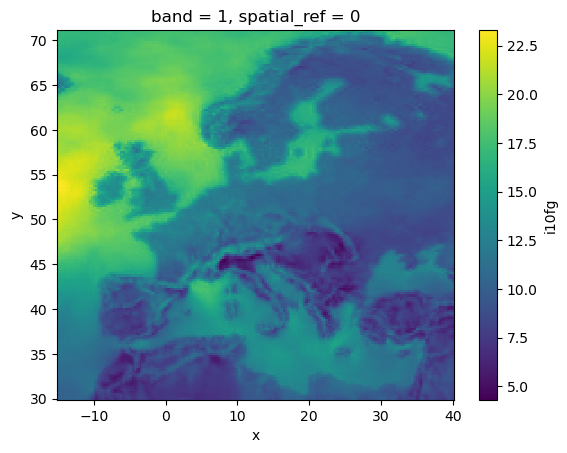

In [14]:
# load one raster of climatology

test_1_2 = xr.open_dataset('data/climatology/instantaneous_10m_wind_gust_non_cut/max_winds_europe_1_2.tif', 
                           engine='rasterio')
test_1_2['band_data'].plot()

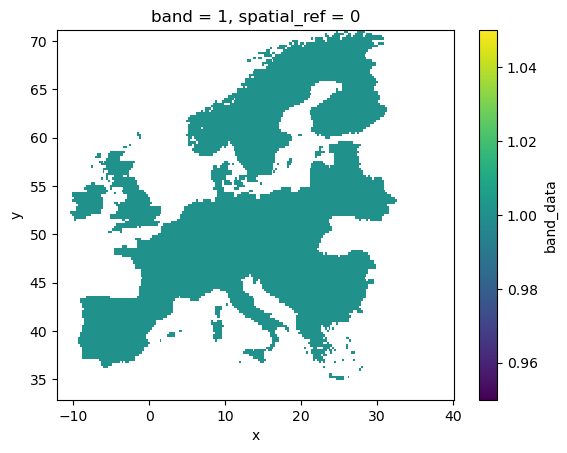

In [15]:
# import eu_limits

eu_final_raster = xr.open_dataset('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/pre_processing/maps/QGIS/raster/eu_final_raster.tif',
                                  engine='rasterio')
eu_final_raster['band_data'].plot()

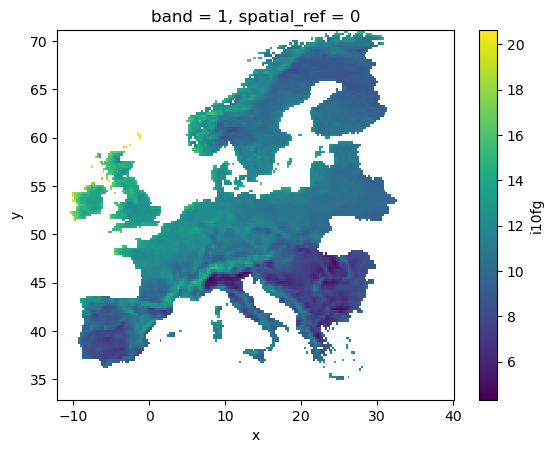

In [16]:
# limit the wind speed with the eu limits

test_1_2_cut = test_1_2['band_data'].where(eu_final_raster['band_data'] == 1)
test_1_2_cut.plot()

In [17]:
# save it as a new raster

data_array = test_1_2_cut
data_array = data_array.rio.write_crs("EPSG:4326")  # Assign CRS (WGS84)

# Save as a raster file (GeoTIFF)
output_path = f'data/climatology/instantaneous_10m_wind_gust_cut/max_winds_europe_1_2_cut.tif'
data_array.rio.to_raster(output_path)


In [18]:
# automate the process for all the rasters

# load all the rasters

path = 'data/climatology/instantaneous_10m_wind_gust_non_cut/'
files = os.listdir(path)
files = [f for f in files if f.endswith('.tif')]
files

# load the eu limits

eu_final_raster = xr.open_dataset('/Users/fabienaugsburger/Documents/GitHub/master-project-cleaned/pre_processing/maps/QGIS/raster/eu_final_raster.tif',
                                    engine='rasterio')

# loop through the rasters

for file in files:
    test = xr.open_dataset(path + file, engine='rasterio')
    test_cut = test['band_data'].where(eu_final_raster['band_data'] == 1)
    data_array = test_cut
    data_array = data_array.rio.write_crs("EPSG:4326")  # Assign CRS (WGS84)
    output_path = f'data/climatology/instantaneous_10m_wind_gust_cut/{file[:-4]}_cut.tif'
    data_array.rio.to_raster(output_path)
    print(file + ' done')

    

max_winds_europe_1_3.tif done
max_winds_europe_2_25.tif done
max_winds_europe_2_19.tif done
max_winds_europe_11_24.tif done
max_winds_europe_11_25.tif done
max_winds_europe_1_2.tif done
max_winds_europe_12_3.tif done
max_winds_europe_10_1.tif done
max_winds_europe_2_27.tif done
max_winds_europe_1_5.tif done
max_winds_europe_2_22.tif done
max_winds_europe_1_4.tif done
max_winds_europe_12_5.tif done
max_winds_europe_1_7.tif done
max_winds_europe_1_17.tif done
max_winds_europe_2_2.tif done
max_winds_europe_2_3.tif done
max_winds_europe_12_17.tif done
max_winds_europe_1_16.tif done
max_winds_europe_1_14.tif done
max_winds_europe_2_1.tif done
max_winds_europe_3_11.tif done
max_winds_europe_10_11.tif done
max_winds_europe_1_29.tif done
max_winds_europe_1_11.tif done
max_winds_europe_10_29.tif done
max_winds_europe_11_7.tif done
max_winds_europe_12_11.tif done
max_winds_europe_1_10.tif done
max_winds_europe_1_12.tif done
max_winds_europe_10_16.tif done
max_winds_europe_2_7.tif done
max_winds_